In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Conv1D, Flatten, Dropout, Dense, Reshape
from utility import get_sample_df, train_autoencoder_based_models

Using TensorFlow backend.


In [3]:
df = get_sample_df()

In [27]:
nb_features = 1
window_size = 10
model = Sequential()
model.add(Conv1D(filters=5, kernel_size=10, input_shape=(window_size, nb_features), activation='relu'))
model.add(Reshape(target_shape=(5,1)))
model.add(Conv1D(filters=10, kernel_size=5, activation='relu'))
model.add(Reshape(target_shape=(10,1)))
model.summary()
model.compile(loss='mse', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 1, 5)              55        
_________________________________________________________________
reshape_8 (Reshape)          (None, 5, 1)              0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 1, 10)             60        
_________________________________________________________________
reshape_9 (Reshape)          (None, 10, 1)             0         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [29]:
nb_epoch = 20
df = train_autoencoder_based_models(df,window_size,nb_epoch)

/opt/conda/lib/python3.6/site-packages/keras/models.py:981: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


KeyboardInterrupt: 

In [16]:
df.loc[0:1548] = sum(df.anomaly_score)/len(df)

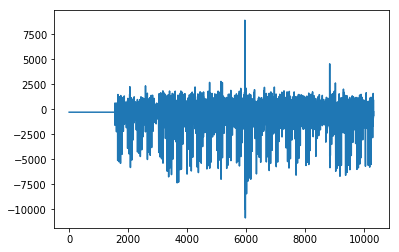

In [18]:
plt.plot(df.anomaly_score)

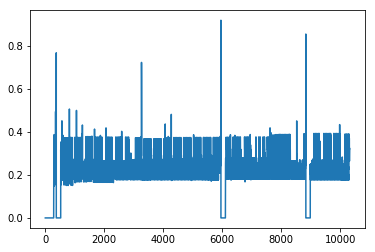

In [27]:
contextOSE_df = pd.read_csv("results/contextOSE/realKnownCause/contextOSE_nyc_taxi.csv")
plt.plot(contextOSE_df.anomaly_score)